## **Task 4: Visualize Data**
<hr/>

### **0. Import & Install libraries**

In [1]:
# Install libraries

In [117]:
# Import libraries
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import pandas as pd
from itertools import combinations
## Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')

<hr/>

### **1. Kết nối và lấy data từ Local MongoDB**

In [23]:
client = MongoClient('mongodb://localhost:27017/')
db = client['T2_PreprocessedData']

In [24]:
# Users Infor
collection = db['Users_Infor']
cursor = collection.find()
data_list = list(cursor)

ui_df = pd.DataFrame(data_list, index = None)
ui_df = ui_df.drop('_id', axis=1, errors='ignore')
ui_df.head()

,user_id,user_name,member_since
0,ur0028288,merrywood,2000-11-01
1,ur0032412,Buckywunder,2000-01-01
2,ur0033913,Sylviastel,2001-01-01
3,ur0035229,Spleen,2001-01-01
4,ur0035641,pk-2,2001-02-01


In [25]:
# Movies Infor
collection = db['Movies_Infor']
cursor = collection.find()
data_list = list(cursor)

mi_df = pd.DataFrame(data_list, index = None)
mi_df = mi_df.drop('_id', axis=1, errors='ignore')
mi_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"['Comedy', 'Drama', 'Family']",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"['Adventure', 'Comedy', 'Drama', 'Romance', 'W...",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
2,tt0017136,Metropolis,In a futuristic city sharply divided between t...,9180,"['Drama', 'Sci-Fi']",1927-03-13,United States,"['Brigitte Helm', 'Alfred Abel', 'Gustav Fröhl...",['Fritz Lang'],184863.0,8.3,6,6
3,tt0017925,The General,After being rejected by the Confederate milita...,4680,"['Action', 'Adventure', 'Comedy', 'Drama', 'War']",1927-01-02,United States,"['Buster Keaton', 'Marion Mack', 'Glen Cavender']","['Clyde Bruckman', 'Buster Keaton']",97815.0,8.1,2,1
4,tt0019109,Lonesome,Two lonely people in the big city meet and enj...,4140,"['Comedy', 'Drama', 'Romance']",1928-11-22,Hungary,"['Barbara Kent', 'Glenn Tryon', 'Fay Holderness']",['Pál Fejös'],2586.0,7.8,1,0


In [26]:
# Ratings
collection = db['Ratings']
cursor = collection.find()
data_list = list(cursor)

r_df = pd.DataFrame(data_list, index = None)
r_df = r_df.drop('_id', axis=1, errors='ignore')
r_df.head()

,user_id,movie_id,user_rating
0,ur0028288,tt2392830,8.0
1,ur0028288,tt4635282,6.0
2,ur0028288,tt0470752,9.0
3,ur0028288,tt3681794,6.0
4,ur0028288,tt0063442,9.0


<hr/>

### **2. Tiền xử lý dữ liệu**

In [38]:
mi_df['genre'] = mi_df['genre'].apply(eval)

<hr/>

### **3. Trực quan hóa dữ liệu (Thống kê)**

In [ ]:
mi_df.head()

#### **3.1. Thống kê: Số lượng phim theo từng thể loại:**

##### **1 thể loại:**  

In [92]:
nf_genre1_df = mi_df.copy()

In [93]:
nf_genre1_df = nf_genre1_df.explode('genre')
nf_genre1_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Comedy,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Drama,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,Family,1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Adventure,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,Comedy,1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3


In [32]:
genre1_nfilm = nf_genre1_df['genre'].value_counts()
genre1_nfilm_df = pd.DataFrame({'genre': genre1_nfilm.index, 'num_film': genre1_nfilm.values})
genre1_nfilm_df

,genre,num_film
0,Drama,1748
1,Thriller,987
2,Comedy,960
3,Action,825
4,Adventure,706
5,Crime,630
6,Sci-Fi,536
7,Mystery,529
8,Romance,508
9,Horror,482


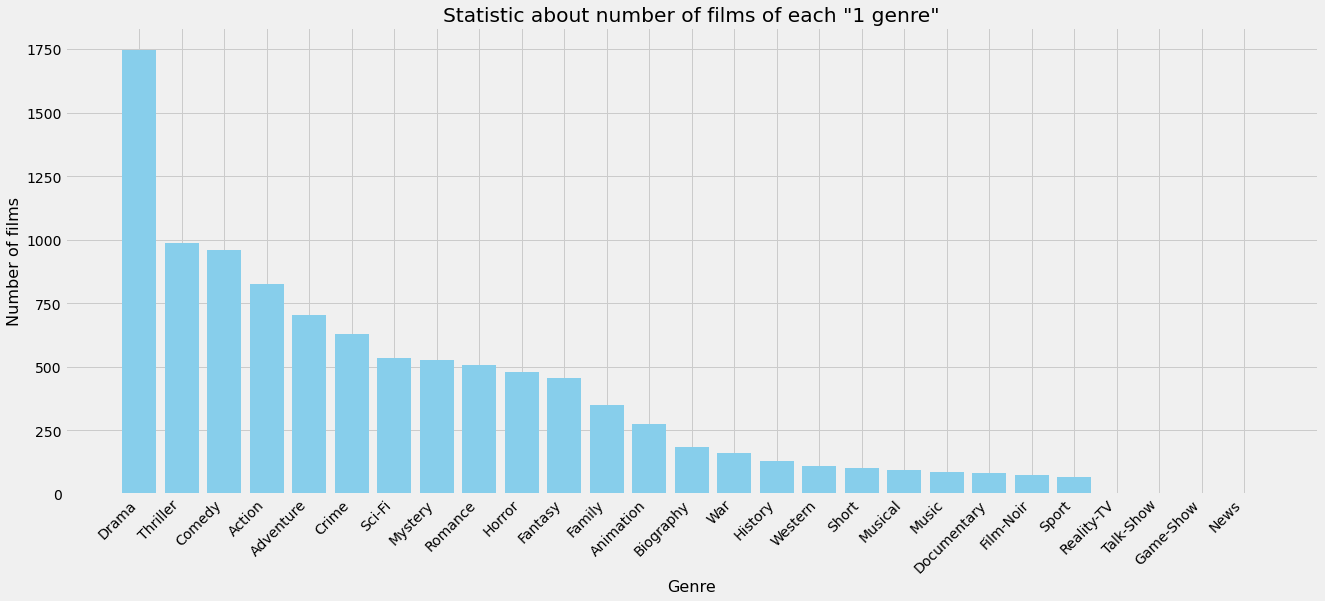

In [50]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(genre1_nfilm_df['genre'], genre1_nfilm_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each "1 genre"')
plt.show()

##### **2 thể loại (Top 10):**

In [141]:
nf_genre2_df = mi_df.copy()

In [142]:
# Create combinations of two elements from the list
nf_genre2_df['2genres'] = nf_genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))

nf_genre2_df = nf_genre2_df.explode('2genres')
nf_genre2_df = nf_genre2_df['2genres'].value_counts()[:10]
nf_genre2_df = pd.DataFrame({'2genres': nf_genre2_df.index, 'num_film': nf_genre2_df.values})
nf_genre2_df['2genres'] = nf_genre2_df['2genres'].astype(str)
nf_genre2_df

0       [(Comedy, Drama), (Comedy, Family), (Drama, Fa...
1       [(Adventure, Comedy), (Adventure, Drama), (Adv...
2                                       [(Drama, Sci-Fi)]
3       [(Action, Adventure), (Action, Comedy), (Actio...
4       [(Comedy, Drama), (Comedy, Romance), (Drama, R...
                              ...                        
3242    [(Action, Adventure), (Action, Fantasy), (Acti...
3243    [(Drama, Mystery), (Drama, Romance), (Drama, T...
3244    [(Drama, Horror), (Drama, Mystery), (Drama, Th...
3245    [(Drama, History), (Drama, Western), (History,...
3246    [(Biography, Comedy), (Biography, Drama), (Bio...
Name: 2genres, Length: 3247, dtype: object

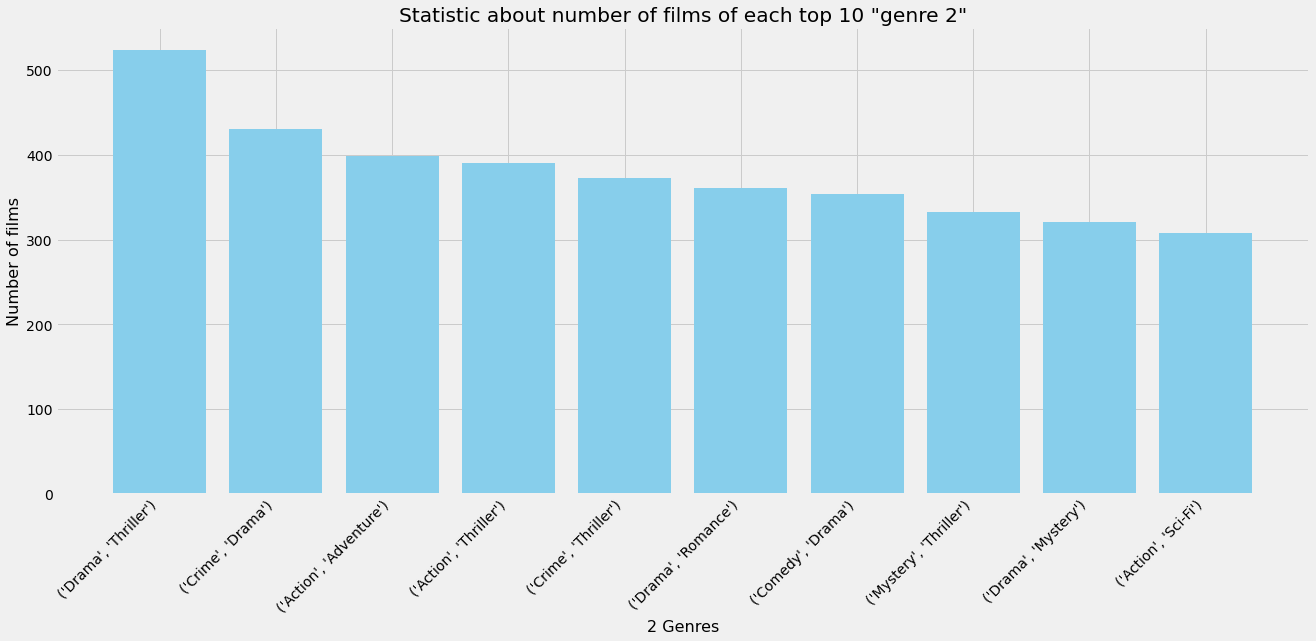

In [96]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(nf_genre2_df['2genres'], nf_genre2_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genres',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each top 10 "genre 2"')
plt.show()

##### **3 thể loại (Top 10):**

In [98]:
nf_genre3_df = mi_df.copy()

In [99]:
# Create combinations of two elements from the list
nf_genre3_df['3genres'] = nf_genre3_df['genre'].apply(lambda x: list(combinations(x, 3)))

nf_genre3_df = nf_genre3_df.explode('3genres')
nf_genre3_df = nf_genre3_df['3genres'].value_counts()[:10]
nf_genre3_df = pd.DataFrame({'3genres': nf_genre3_df.index, 'num_film': nf_genre3_df.values})
nf_genre3_df['3genres'] = nf_genre3_df['3genres'].astype(str)
nf_genre3_df

,3genres,num_film
0,"('Crime', 'Drama', 'Thriller')",254
1,"('Action', 'Adventure', 'Sci-Fi')",204
2,"('Drama', 'Mystery', 'Thriller')",199
3,"('Action', 'Crime', 'Thriller')",153
4,"('Action', 'Drama', 'Thriller')",144
5,"('Adventure', 'Comedy', 'Family')",141
6,"('Action', 'Adventure', 'Fantasy')",140
7,"('Animation', 'Comedy', 'Family')",138
8,"('Adventure', 'Family', 'Fantasy')",137
9,"('Animation', 'Adventure', 'Family')",132


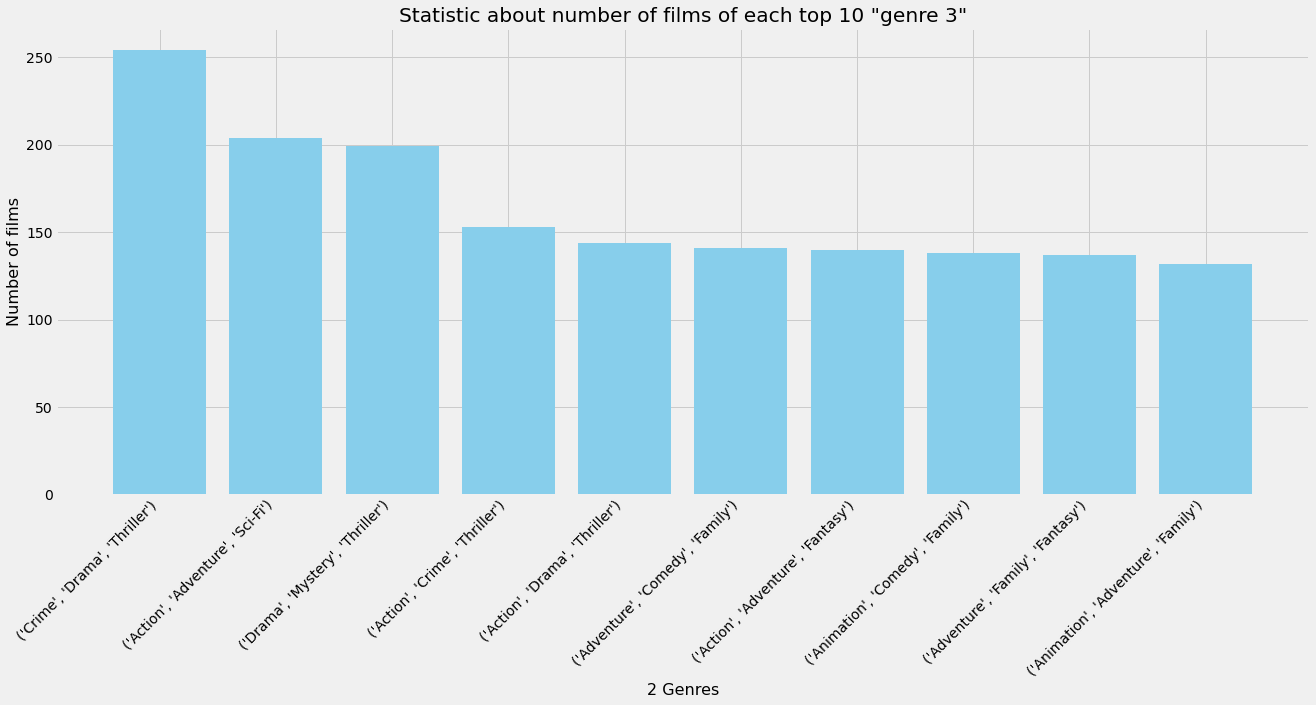

In [100]:
# Plotting Matplotlib
plt.figure(figsize=(20, 8))
plt.bar(nf_genre3_df['3genres'], nf_genre3_df['num_film'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('2 Genres',fontsize = 16)
plt.ylabel('Number of films',fontsize = 16)
plt.title('Statistic about number of films of each top 10 "genre 3"')
plt.show()

#### **3.2. Thống kê: Số lượng giải thưởng + đề cử theo từng thể loại:**

##### **1 thể loại:**  

In [105]:
tan_genre1_df = mi_df.copy()

In [ ]:
tan_genre1_df = tan_genre1_df.explode('genre')
tan_genre1_df.head()

In [109]:
tan_genre1_df['totalAN'] = tan_genre1_df['totalAwards'] + tan_genre1_df['totalNominations']

In [116]:
tan_genre1 = tan_genre1_df.groupby('genre')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[:10]
tan_genre1

,totalAN,totalAwards,totalNominations
genre,,,
Drama,77590,26637,50953
Thriller,28551,9186,19365
Adventure,27051,9074,17977
Comedy,26844,8716,18128
Action,25860,8260,17600
Sci-Fi,19960,6113,13847
Romance,18580,6337,12243
Crime,17918,5686,12232
Fantasy,17467,5873,11594


In [121]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre1.index, y=tan_genre1['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre1.index, y=tan_genre1['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 1" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **2 thể loại:**  

In [156]:
tan_genre2_df = mi_df.copy()

In [157]:
tan_genre2_df['2genres'] = tan_genre2_df['genre'].apply(lambda x: list(combinations(x, 2)))
tan_genre2_df = tan_genre2_df.explode('2genres')
tan_genre2_df['2genres'] = tan_genre2_df['2genres'].astype(str)
tan_genre2_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations,2genres
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Drama')"
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Family')"
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Drama', 'Family')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Drama')"


In [158]:
tan_genre2_df['totalAN'] = tan_genre2_df['totalAwards'] + tan_genre2_df['totalNominations']

In [159]:
tan_genre2 = tan_genre2_df.groupby('2genres')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[:10]
tan_genre2

,totalAN,totalAwards,totalNominations
2genres,,,
"('Drama', 'Thriller')",21370,6820,14550
"('Drama', 'Romance')",16778,5699,11079
"('Action', 'Adventure')",16712,5602,11110
"('Comedy', 'Drama')",15943,5277,10666
"('Crime', 'Drama')",15062,4849,10213
"('Adventure', 'Fantasy')",13034,4495,8539
"('Biography', 'Drama')",12851,4148,8703
"('Adventure', 'Sci-Fi')",12484,4048,8436
"('Action', 'Sci-Fi')",12366,3924,8442


In [160]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre2.index, y=tan_genre2['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre2.index, y=tan_genre2['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 2" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

##### **3 thể loại:**  

In [161]:
tan_genre3_df = mi_df.copy()

In [162]:
tan_genre3_df['3genres'] = tan_genre3_df['genre'].apply(lambda x: list(combinations(x, 3)))
tan_genre3_df = tan_genre3_df.explode('3genres')
tan_genre3_df['3genres'] = tan_genre3_df['3genres'].astype(str)
tan_genre3_df.head()

,movie_id,title,introduction,runtimeSeconds,genre,releaseDate,releaseLocation,actors,directors,totalRatings,ratingStar,totalAwards,totalNominations,3genres
0,tt0012349,The Kid,"The Tramp cares for an abandoned child, but ev...",4080,"[Comedy, Drama, Family]",1921-02-06,United States,"['Charles Chaplin', 'Edna Purviance', 'Jackie ...",['Charles Chaplin'],134289.0,8.2,2,0,"('Comedy', 'Drama', 'Family')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Drama')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Romance')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Comedy', 'Western')"
1,tt0015864,The Gold Rush,A prospector goes to the Klondike during the 1...,5700,"[Adventure, Comedy, Drama, Romance, Western]",1925-08-16,United States,"['Charles Chaplin', 'Mack Swain', 'Tom Murray']",['Charles Chaplin'],118269.0,8.1,5,3,"('Adventure', 'Drama', 'Romance')"


In [163]:
tan_genre3_df['totalAN'] = tan_genre3_df['totalAwards'] + tan_genre3_df['totalNominations']

In [165]:
tan_genre3 = tan_genre3_df.groupby('3genres')[['totalAN', 'totalAwards','totalNominations']].sum().sort_values(by='totalAN', ascending=False)[1:11]
tan_genre3

,totalAN,totalAwards,totalNominations
3genres,,,
"('Action', 'Adventure', 'Sci-Fi')",9879,3295,6584
"('Crime', 'Drama', 'Thriller')",8512,2739,5773
"('Drama', 'Mystery', 'Thriller')",8079,2323,5756
"('Action', 'Adventure', 'Fantasy')",7685,2805,4880
"('Action', 'Adventure', 'Drama')",5891,2099,3792
"('Adventure', 'Drama', 'Fantasy')",5635,2012,3623
"('Biography', 'Drama', 'History')",5517,2010,3507
"('Drama', 'Sci-Fi', 'Thriller')",5365,1573,3792
"('Adventure', 'Family', 'Fantasy')",5149,1696,3453


In [166]:
fig = go.Figure(data=[
    go.Bar(name='totalNominations', x=tan_genre3.index, y=tan_genre3['totalNominations']),
    go.Bar(name='totalAwards', x=tan_genre3.index, y=tan_genre3['totalAwards'])
   
])

fig.update_layout(barmode='stack', title='Top 10 "Genre 3" have the highest total Nominations and Awards')

# Hiển thị biểu đồ
fig.show()

<hr/>

### **4. Trực quan hóa dữ liệu (Hệ thống gợi ý)**

#### **4.1. Hệ thống gợi ý: Top n bộ phim theo thể loại**
##### *Filter: 1,2,3 thể loại*

In [77]:
genre_df = mi_df.copy()
genre_df['genre'] = genre_df['genre'].astype(str)

##### **Visualize:**

In [ ]:
# Chọn thử Drama và tìm top n bộ phim 
search_string = 'drama'
mask = genre_df['genre'].str.lower().str.contains(search_string.lower())
drama_movie_df = genre_df[mask].reset_index()
drama_movie_df

In [79]:
drama_movie_df = drama_movie_df.sort_values(by='ratingStar',ascending=False)
drama_movie_df = drama_movie_df[['title', 'ratingStar']]
drama_movie_df = drama_movie_df[:10]

In [ ]:
# Plotting Matplotlib
# plt.figure(figsize=(20, 8))
# plt.bar(a_df['title'], a_df['ratingStar'], color='skyblue')
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Title',fontsize = 16)
# plt.ylabel('Rating Star',fontsize = 16)
# plt.title('Top 10 Drama Movies have the highest rating star')
# plt.show()

In [86]:
# Plotting Plotly
# Vẽ biểu đồ
fig = px.bar(drama_movie_df, x='ratingStar', y='title', orientation='h', title='Top 10 film drama have the highest average rating star')
fig.show()

##### **Function:**

In [89]:
def rs_genre(df, search_string):
    mask = df['genre'].str.lower().str.contains(search_string.lower())
    genre_df = df[mask].reset_index()
    genre_df =  genre_df.sort_values(by='ratingStar',ascending=False)
    genre_df = genre_df[['movie_id', 'title', 'ratingStar']]
    genre_df = genre_df[:10]

    return genre_df[['movie_id', 'title', 'ratingStar']]         

In [90]:
rs_genre(genre_df, 'comedy')

,movie_id,title,ratingStar
143,tt10468596,Persona 5 Royal,9.5
427,tt26733316,The sad roblox buly story,9.5
452,tt10680606,Minecraft Epic,9.5
658,tt0252487,The Chaos Class,9.2
152,tt3944082,Persona 5,9.2
314,tt9357776,Wilford 'Motherloving' Warfstache,9.1
754,tt2861424,Rick and Morty,9.1
451,tt10306206,A Heist with Markiplier,9.1
172,tt0388629,One Piece,9.0
195,tt2098220,Hunter x Hunter,9.0
